# Distribuições Contínuas

O objetivo desse notebook é ajudar na visualização de algumas distribuições contínuas conhecidas.

## Setup

In [1]:
## Importando módulos
# Análise
import numpy as np
import random
import scipy.stats as stats
import math

# Visualização
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Estilos dos gráficos
from matplotlib import style
style.use('ggplot')

## Uniforme

Uma variável aleatória possui distribuição contínua **Uniforme** quando ela sua função de densidade de probabilidade (*fdp*) é constante dentro de um intervalo $[a,b]$.

$f(x) = \frac{1}{b-a}, x\in [a,b]$.

A função de densidade acumulada (*fda*) é $F(x) = P(X \leq x) = \int_a^x f(t) dt = \frac{x-a}{b-a}, x\in [a,b]$.

A esperança da distribuição é $E[X] = \frac{a+b}{2}$ e a variância é $Var[x] = \frac{(b-a)^2}{12}$.

### Funções de Densidade

In [3]:
# Definindo parâmetros: extremos do intervalo
a = 0
b = 1

# Definindo fdp
f = [1 / (b - a) for x in np.linspace(a, b, 100)]

# Definindo FDA
F = [(x - a) / (b - a) for x in np.linspace(a, b, 100)]

Text(0.5, 0.98, 'Funções de Densidade - Uniforme[0, 1]')

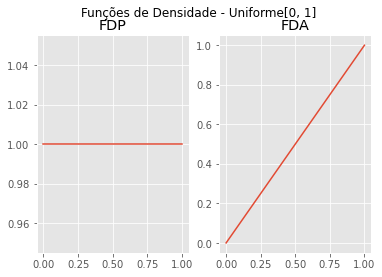

In [4]:
# Plottando
fig, axs = plt.subplots(1, 2)
x = np.linspace(a, b, 100)

# FDP e FDA
## FDP
axs[0].plot(x, f)
axs[0].set_title(f"FDP")

## FDA
axs[1].plot(x, F)
axs[1].set_title(f"FDA")

## Geral
fig.suptitle(f"Funções de Densidade - Uniforme[{a}, {b}]")

### Medidas de Posição (Esperança) e Dispersão (Variância)

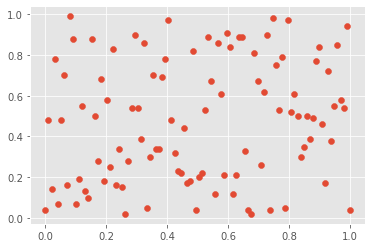

In [5]:
# Pegando aleatoriamente vários valores da distribuição
valores_uniforme = [random.randrange(a*100, b*100) / 100 for i in range(100)]

# Plottando
plt.scatter(x, valores_uniforme)

In [6]:
# Vendo média e comparando com esperança teórica
print(f"Média dos valores: {round(np.mean(valores_uniforme), 2)}.")
print(f"Valor teórico: {round((a + b) / 2, 2)}.")

Média dos valores: 0.48.
Valor teórico: 0.5.


In [7]:
# Vendo variância e comparando com esperança teórica
print(f"Variância dos valores: {round(np.std(valores_uniforme)**2, 3)}.")
print(f"Valor teórico: {round((b - a)**2 / 12, 3)}.")

Variância dos valores: 0.088.
Valor teórico: 0.083.


## Exponencial

A distribuição exponencial é a distribuição que modela o tempo entre eventos de uma distribuição discreta de **Poisson**, as quais ocorrem com frequência/taxa média $\lambda$.

Ela também pode ser interpretada como o análogo contínuo da distribuição discreta Geométrica, também possuindo perda de memória. ([Fonte](https://en.wikipedia.org/wiki/Exponential_distribution)).

Uma variável aleatória possui distribuição contínua **Exponencial** quando ela sua função de densidade de probabilidade (*fdp*) é dada por:

$f(x) = \lambda e^{-\lambda x}, x\geq 0$ e $\lambda > 0$.

A função de densidade acumulada (*fda*) é $F(x) = P(X \leq x) = \int_{0}^x f(t) dt = -e^{-\lambda t}|_{t=0}^x = 1 - e^{-\lambda x}$.

A esperança da distribuição é $E[X] = \frac{1}{\lambda}$ e a variância é $Var[x] = \frac{1}{\lambda^2}$.

### Funções de Densidade

In [8]:
# Definindo parâmetros: lambda
lambda_exp = 1

# Definindo fdp
f = [lambda_exp * math.e**(-lambda_exp * x) for x in np.linspace(0, 4, 400)]

# Definindo FDA
F = [1 - math.e **(-lambda_exp * x) for x in np.linspace(0, 4, 400)]

Text(0.5, 0.98, 'Funções de Densidade - Exponencial(λ = 1)')

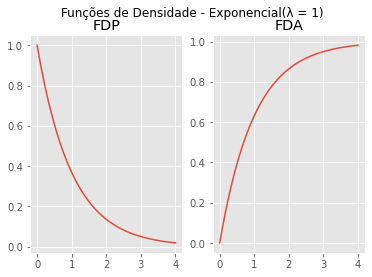

In [9]:
# Plottando
fig, axs = plt.subplots(1, 2)
x = np.linspace(0, 4, 400)

# FDP e FDA
## FDP
axs[0].plot(x, f)
axs[0].set_title(f"FDP")

## FDA
axs[1].plot(x, F)
axs[1].set_title(f"FDA")

## Geral
fig.suptitle(f"Funções de Densidade - Exponencial(λ = {lambda_exp})")

### Simulando Probabilidades usando Monte Carlo

A ideia será, a partir de um input para $X \leq x$, calcular a probabilidade desse valor ocorrer dada a distribuição. O caminho analítico seria apenas calcular $F(2)$, mas qual a graça disso? :P

In [10]:
# Definindo funções
def f_exp(lambda_exp, x):
    return lambda_exp * math.e**(-lambda_exp * x)

def F_exp(lambda_exp, x):
    return 1 - math.e**(-lambda_exp * x)

In [37]:
# Calcular a probabilidade de X ser menor que...
x_menor_que = 1
f_menor_que = f_exp(lambda_exp, x_menor_que)

# Simulando usando Monte Carlo
## Armazendo lista
valores_x = []
valores_x_abaixo = []
valores_y = []
valores_f = []
valores_abaixo_curva = []

## Simulando vários valores entre 0 e x_menor_que e vendo a proporção que está abaixo de f(x)
for i in range(10000):
    # Gerando valores
    x = random.randrange(0 * 1000, x_menor_que * 1000) / 1000
    y = random.randrange(0 * 1000, lambda_exp * 1000) / 1000
    f = f_exp(lambda_exp, x)

    # Adicionando às listas
    valores_x.append(x)
    valores_y.append(y)
    valores_f.append(f)
    if y <= f:
        valores_x_abaixo.append(x)
        valores_abaixo_curva.append(y)

# Calculando proporção
proporcao_exp = round(len(valores_abaixo_curva) / len(valores_x), 3)
print(f"Proporção de valores menor que {x_menor_que}: {100*proporcao_exp}%.")
print(f"Valor teórico: {round(100*F_exp(lambda_exp, x_menor_que), 1)}%.")

Proporção de valores menor que 1: 62.4%.
Valor teórico: 63.2%.


Text(0.5, 1.0, 'Exponencial(λ = 1) - Probabilidade de X < 1')

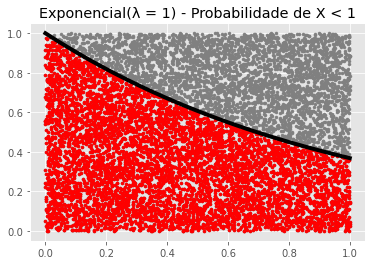

In [12]:
# Grafando
plt.scatter(valores_x, valores_y, color='grey', marker=".")
plt.scatter(valores_x_abaixo, valores_abaixo_curva, color='red', marker=".")
plt.plot(np.unique(valores_x),
         [f_exp(lambda_exp, i) for i in np.unique(valores_x)],
         color = 'black', linewidth=4)
plt.title(f"Exponencial(λ = {lambda_exp}) - Probabilidade de X < {x_menor_que}")

### Medidas de Posição (Esperança) e Dispersão (Variância)

In [13]:
# Coletando valores aleatórios da distribuição Poisson
lambda_exp2 = 1.5
valores_exp = [np.random.exponential(scale=1/lambda_exp2) for i in range(10000)]

In [14]:
# Vendo média e comparando com esperança teórica
print(f"Médias dos valores: {round(np.mean(valores_exp), 2)}.")
print(f"Valor teórico: {round(1 / lambda_exp2, 2)}.")

Médias dos valores: 0.66.
Valor teórico: 0.67.


In [15]:
# Vendo variância e comparando com variância teórica teórica
print(f"Variância dos valores: {round(np.std(valores_exp)**2, 2)}.")
print(f"Valor teórico: {round(1 / lambda_exp2**2, 2)}.")

Variância dos valores: 0.45.
Valor teórico: 0.44.


## Distribuição Normal

Talvez a mais famosa das distribuições, a Distribuição **Normal** modela variáveis aleatórias que ocorrem com média $\mu$ e desvio-padrão $\sigma$, seguindo a seguinte fdp:

$f(x) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{\frac{-(x-\mu)^2}{2\sigma^2}}$

Além de modelar vários fenômenos naturais, a distribuição normal é importante por conta do **Teorema do Limite Central**...

Além disso, distribuições normais possuem uma propriedade interessante: a combinação linear de duas ou mais normais *independentes* também será uma normal, com média $\mu = \sum a_i \mu_i$ e variância $\sigma^2 = \sum a_i^2 \sigma_i^2$.

### Função de Densidade

In [16]:
# Definindo função
def f_normal(mu, sigma, x):
    return 1 / (math.sqrt(2 * math.pi * sigma**2)) * math.e ** (-(x - mu)**2 / (2*sigma**2))

Text(0.5, 0.98, 'Função de Densidade de Probablidade - $\\mathcal{N}$(0,1)')

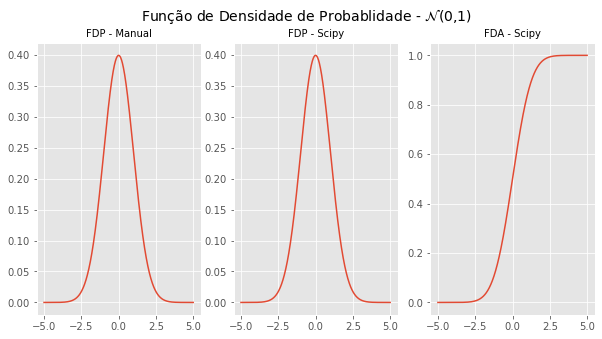

In [17]:
# Definindo parâmetros para a normal-padrão
mu = 0
sigma = 1

# Definindo intervalo
x = np.linspace(-5, 5, 1000)

# Plottando
fig, axs = plt.subplots(1, 3, sharex=True, figsize=(10, 5))

# Manual e do scipy stats
## Manual
axs[0].plot(x, [f_normal(mu, sigma, i) for i in x])
axs[0].set_title("FDP - Manual", size=10)

## FDP - Scipy
axs[1].plot(x, stats.norm.pdf(x, mu, sigma))
axs[1].set_title("FDP - Scipy", size=10)

## FDA - Scipy
axs[2].plot(x, stats.norm.cdf(x, mu, sigma))
axs[2].set_title("FDA - Scipy", size=10)

## Geral
fig.suptitle(r"Função de Densidade de Probablidade - $\mathcal{N}$(0,1)",
             size=14)

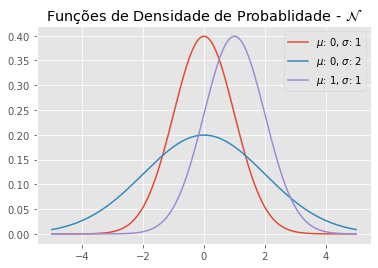

In [18]:
# Comparando curvas
lista_mu = [0, 0, 1]
lista_sigma = [1, 2, 1]

# Plottando
for par in range(len(lista_mu)):
    plt.plot(x, [f_normal(lista_mu[par], lista_sigma[par], i) for i in x],
             label=fr"$\mu$: {lista_mu[par]}, $\sigma$: {lista_sigma[par]}")

plt.title(r"Funções de Densidade de Probablidade - $\mathcal{N}$")
plt.legend()

### Probabilidades e P-Valores

Para achar o valor de $x$ associado a um $P(X \leq x)$, usamos a função `stats.norm.ppf(p)`.

Para achar o p-valor associado a uma estatística $x$, usamos a função `1 - stats.norm.cdf(x)`.

Text(0.5, 0.98, 'Funções de Densidade de Probablidade - N(0,1) - P(-x < X < x) = 95.0% (x=1.96)')

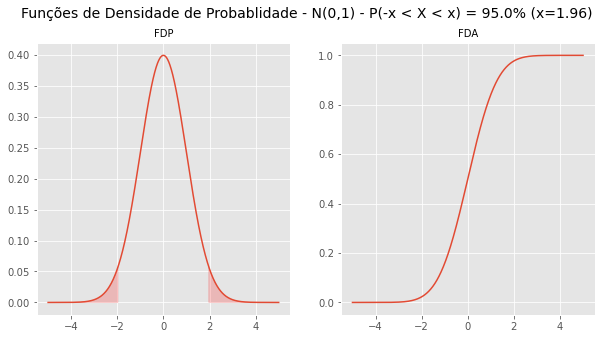

In [19]:
# Calculando probabilidades
## Definindo probabilidade
p = 0.95

## Vendo valor de x associado
px = stats.norm.ppf(1 - (1 - p) / 2)

# Plottando
fig, axs = plt.subplots(1, 2, sharex=True, figsize=(10, 5))

# Gráficos
## FDP
axs[0].plot(x, stats.norm.pdf(x, mu, sigma))
axs[0].fill_between(
    x=x, y1=stats.norm.pdf(x, mu, sigma),
    where=(x > px)|(x < -px),
    color='red', alpha=.2
)
axs[0].set_title("FDP", size=10)

## FDA
axs[1].plot(x, stats.norm.cdf(x, mu, sigma))
axs[1].set_title("FDA", size=10)

## Geral
fig.suptitle(f"Funções de Densidade de Probablidade - N(0,1) - P(-x < X < x) = {100*p}% (x={round(px, 2)})",
             size=14)

In [20]:
# Vendo probabilidades
lista_dp = [i / 2 for i in range(1, 7)]

for dp in lista_dp:
    prob = stats.norm.cdf(dp) - stats.norm.cdf(-dp)
    print(f"Probabilidade de X~N(0, 1) estar dentro de {dp} DPs da média: {round(100*prob, 1)}%.")

Probabilidade de X~N(0, 1) estar dentro de 0.5 DPs da média: 38.3%.
Probabilidade de X~N(0, 1) estar dentro de 1.0 DPs da média: 68.3%.
Probabilidade de X~N(0, 1) estar dentro de 1.5 DPs da média: 86.6%.
Probabilidade de X~N(0, 1) estar dentro de 2.0 DPs da média: 95.4%.
Probabilidade de X~N(0, 1) estar dentro de 2.5 DPs da média: 98.8%.
Probabilidade de X~N(0, 1) estar dentro de 3.0 DPs da média: 99.7%.


## Qui-Quadrado ($\mathcal{X}_n^2$)

Obtida através da soma dos quadrados de $n$ variáveis aleatórias *independentes* que seguem uma distribuição *normal padrão*. Matematicamente,

$X \sim \mathcal{X}_n^2 \iff X = \sum_{i=1}^n Z_i^2, Z_i \sim \mathcal{N}(0,1)$

A variável resultante terá uma distribuição **Qui-Quadrado** com *n* graus de liberdade, sendo $E[x] = n$ e $Var[X] = 2n$.

De modo geral, a distribuição qui-quadrado é útil para modelar processos que se originam da soma de quadrados de variáveis normais (em geral, erros quadráticos em uma série de instâncias).

### Funções de Densidade

In [21]:
# Definindo graus de liberdade (número de somas) e parâmetros da normal
n = 5
mu = 0
sigma = 1

# Gerando n variáveis aleatórias normais
Z = np.random.normal(loc=0, scale=1, size=n)

# Calculando qui-quadrado correspondente
chi_squared = np.sum(Z**2)

# Repetindo procedimento 10000 vezes para gerar uma distribuição
num_amostras = 10000
chi = np.zeros(num_amostras, dtype=float)
for i in range(num_amostras):
    x = np.random.normal(mu, sigma, n)
    chi[i] = np.sum(x**2)

Text(0.5, 0.98, 'Função de Densidade de Probablidade - $\\mathcal{X}_{n=5}^2$')

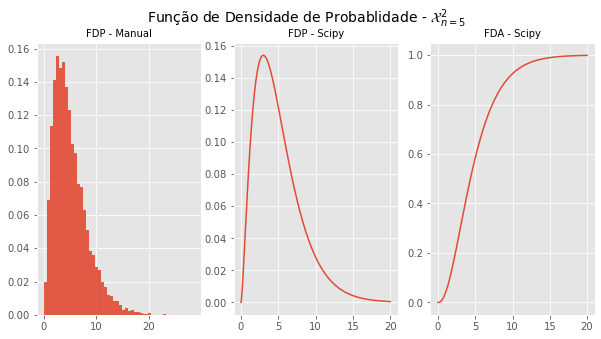

In [22]:
# Definindo intervalo
x = np.linspace(0, 20, 1000)

# Plottando
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

# Manual e do scipy stats
## Manual
axs[0].hist(chi, bins=50, density=True, alpha=.9)
axs[0].set_title("FDP - Manual", size=10)

## FDP - Scipy
axs[1].plot(x, stats.chi2.pdf(x, df=n))
axs[1].set_title("FDP - Scipy", size=10)

## FDA - Scipy
axs[2].plot(x, stats.chi2.cdf(x, df=n))
axs[2].set_title("FDA - Scipy", size=10)

## Geral
fig.suptitle(r"Função de Densidade de Probablidade - $\mathcal{X}_{n=5}^2$",
             size=14)

### Esperança e Variância

In [23]:
# Vendo média dos valores gerados e comparando com esperança teórica
print(f"Média dos valores: {round(np.mean(chi), 2)}.")
print(f"Valor teórico: {n}.")

Média dos valores: 5.02.
Valor teórico: 5.


In [24]:
# Vendo variância dos valores gerados e comparando com esperança teórica
print(f"Variância dos valores: {round(np.std(chi)**2, 2)}.")
print(f"Valor teórico: {2*n}.")

Variância dos valores: 10.19.
Valor teórico: 10.


### Comparando curvas com vários graus de liberdade

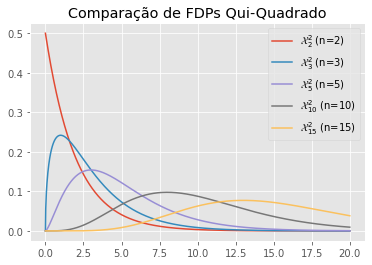

In [25]:
plt.plot(x, stats.chi2.pdf(x, df=2),
         label=r"$\mathcal{X}_2^2$ (n=2)")
plt.plot(x, stats.chi2.pdf(x, df=3),
         label=r"$\mathcal{X}_3^2$ (n=3)")
plt.plot(x, stats.chi2.pdf(x, df=5),
         label=r"$\mathcal{X}_5^2$ (n=5)")
plt.plot(x, stats.chi2.pdf(x, df=10),
         label=r"$\mathcal{X}_{10}^2$ (n=10)")
plt.plot(x, stats.chi2.pdf(x, df=15),
         label=r"$\mathcal{X}_{15}^2$ (n=15)")
plt.title("Comparação de FDPs Qui-Quadrado")
plt.legend()

## T-Student ($\mathcal{T}_n$)

Obtida através da divisão de uma variável aleatória *normal-padrão* $Z$ por uma qui-quadrado $Q$ de $n$ graus de liberdade. As variáveis devem ser independentes!

$X \sim \mathcal{T}_n \iff X = \frac{Z}{\sqrt{\frac{Q}{n}}}; Z \sim \mathcal{N}(0,1), Q \sim \mathcal{X}^2_n$.

A esperança da variável será $E[X] = 0$ e a variância será $Var[X] = \frac{n}{n-2}.

A distribuição T-Student é simétrica em torno de 0 e converge para a normal-padrão quando $n \to \infty$. Para $n$ pequeno, ela se assemelha a uma normal-padrão, mas com caudas mais longas e um pico menor.

De modo geral, usa-se a T-Student quando a amostra que temos é pequena e o desvio-padrão populacional é desconhecido (como é o caso de regressões lineares).

### Funções de Densidade

In [39]:
# Vamos usar os mesmos parâmetros que utilizamos na contrução da qui-quadrado

# Gerando 10.000 instâncias de variáveis t
num_amostras = 10000
t_student = np.zeros(num_amostras, dtype=float)
for i in range(num_amostras):
    z = np.random.normal(mu, sigma)
    t_student[i] = z / (math.sqrt(chi[i] / n))

Text(0.5, 0.98, 'Função de Densidade de Probablidade - $\\mathcal{T}_{n=5}$')

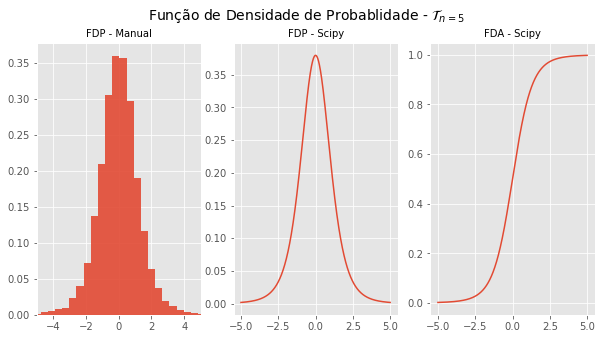

In [40]:
# Definindo intervalo
x = np.linspace(-5, 5, 1000)

# Plottando
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

# Manual e do scipy stats
## Manual
axs[0].hist(t_student, bins=50, density=True, alpha=.9)
axs[0].set_xlim(-5, 5)
axs[0].set_title("FDP - Manual", size=10)

## FDP - Scipy
axs[1].plot(x, stats.t.pdf(x, df=n))
axs[1].set_title("FDP - Scipy", size=10)

## FDA - Scipy
axs[2].plot(x, stats.t.cdf(x, df=n))
axs[2].set_title("FDA - Scipy", size=10)

## Geral
fig.suptitle(r"Função de Densidade de Probablidade - $\mathcal{T}_{n=5}$",
             size=14)

### Esperança e Variância

In [41]:
# Vendo média dos valores gerados e comparando com esperança teórica
print(f"Média dos valores: {round(np.mean(t_student), 2)}.")
print(f"Valor teórico: 0.")

Média dos valores: 0.0.
Valor teórico: 0.


In [42]:
# Vendo variância dos valores gerados e comparando com esperança teórica
print(f"Variância dos valores: {round(np.std(t_student)**2, 2)}.")
print(f"Valor teórico: {round(n / (n-2), 2)}.")

Variância dos valores: 1.64.
Valor teórico: 1.67.


### Comparando curvas com vários graus de liberdade

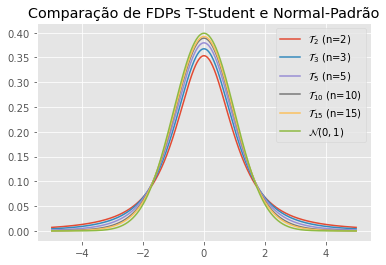

In [30]:
plt.plot(x, stats.t.pdf(x, df=2),
         label=r"$\mathcal{T}_2$ (n=2)")
plt.plot(x, stats.t.pdf(x, df=3),
         label=r"$\mathcal{T}_3$ (n=3)")
plt.plot(x, stats.t.pdf(x, df=5),
         label=r"$\mathcal{T}_5$ (n=5)")
plt.plot(x, stats.t.pdf(x, df=10),
         label=r"$\mathcal{T}_{10}$ (n=10)")
plt.plot(x, stats.t.pdf(x, df=15),
         label=r"$\mathcal{T}_{15}$ (n=15)")
plt.plot(x, stats.norm.pdf(x, loc=0, scale=1),
         label=r"$\mathcal{N}(0,1)$")
plt.title("Comparação de FDPs T-Student e Normal-Padrão")
plt.legend()

## Distribuição F

Obtida através da divisão de duas variáveis qui-quadrado independentes:

$X \sim F_{n_1, n_2} \iff X = \frac{Q_1/n_1}{Q_2/n_2}; Q_1 \sim \mathcal{X}^2_{n_1}, Q_2 \sim \mathcal{X}^2_{n_2}$.

De modo geral, usa-se a distribuição F para modelar a razão das variâncias entre duas populações/grupos e analisar se há diferença significativa entre eles, como é o caso da ANOVA.

In [31]:
# Gerando qui-quadrados
n1 = 10
n2 = 15

# Gerando 10.000 amostras das qui-quadrados
num_amostras = 10000
f_chi1 = np.zeros(num_amostras, dtype=float)
f_chi2 = np.zeros(num_amostras, dtype=float)
f = np.zeros(num_amostras, dtype=float)

for i in range(num_amostras):
    # Gerando n1, n2 variáveis aleatórias normais
    z1 = np.random.normal(mu, sigma, n1)
    z2 = np.random.normal(mu, sigma, n2)

    # Gerando qui-quadrados
    f_chi1[i] = np.sum(z1**2)
    f_chi2[i] = np.sum(z2**2)

    # Gerando F
    f[i] = (f_chi1[i] / n1) / (f_chi2[i] / n2)

Text(0.5, 0.98, 'Função de Densidade de Probablidade - F(10, 15)')

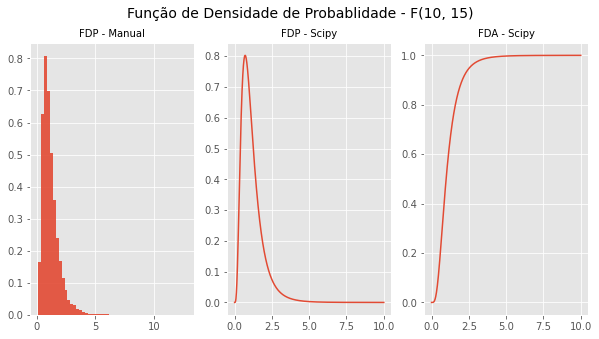

In [32]:
# Definindo intervalo
x = np.linspace(0, 10, 1000)

# Plottando
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

# Manual e do scipy stats
## Manual
axs[0].hist(f, bins=50, density=True, alpha=.9)
axs[0].set_title("FDP - Manual", size=10)

## FDP - Scipy
axs[1].plot(x, stats.f.pdf(x, dfn=n1, dfd=n2))
axs[1].set_title("FDP - Scipy", size=10)

## FDA - Scipy
axs[2].plot(x, stats.f.cdf(x, dfn=n1, dfd=n2))
axs[2].set_title("FDA - Scipy", size=10)

## Geral
fig.suptitle(f"Função de Densidade de Probablidade - F({n1}, {n2})",
             size=14)

### Comparando curvas com vários graus de liberdade

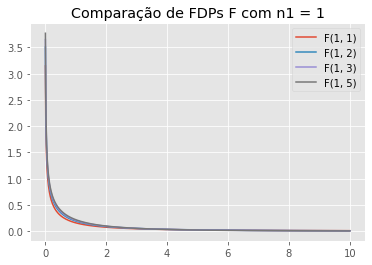

In [33]:
plt.plot(x, stats.f.pdf(x, dfn=1, dfd=1),
         label="F(1, 1)")
plt.plot(x, stats.f.pdf(x, dfn=1, dfd=2),
         label="F(1, 2)")
plt.plot(x, stats.f.pdf(x, dfn=1, dfd=3),
         label="F(1, 3)")
plt.plot(x, stats.f.pdf(x, dfn=1, dfd=5),
         label="F(1, 5)")
plt.title("Comparação de FDPs F com n1 = 1")
plt.legend()

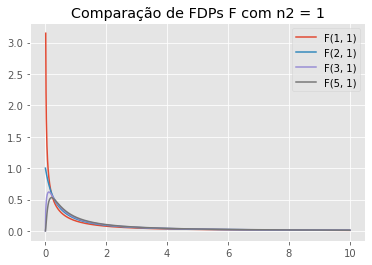

In [34]:
plt.plot(x, stats.f.pdf(x, dfd=1, dfn=1),
         label="F(1, 1)")
plt.plot(x, stats.f.pdf(x, dfd=1, dfn=2),
         label="F(2, 1)")
plt.plot(x, stats.f.pdf(x, dfd=1, dfn=3),
         label="F(3, 1)")
plt.plot(x, stats.f.pdf(x, dfd=1, dfn=5),
         label="F(5, 1)")
plt.title("Comparação de FDPs F com n2 = 1")
plt.legend()

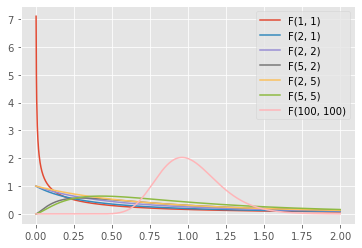

In [35]:
x = np.linspace(0, 2, 1000)

plt.plot(x, stats.f.pdf(x, dfn=1, dfd=1),
         label="F(1, 1)")
plt.plot(x, stats.f.pdf(x, dfn=2, dfd=1),
         label="F(2, 1)")
plt.plot(x, stats.f.pdf(x, dfn=2, dfd=2),
         label="F(2, 2)")
plt.plot(x, stats.f.pdf(x, dfn=5, dfd=2),
         label="F(5, 2)")
plt.plot(x, stats.f.pdf(x, dfn=2, dfd=5),
         label="F(2, 5)")
plt.plot(x, stats.f.pdf(x, dfn=5, dfd=5),
         label="F(5, 5)")
plt.plot(x, stats.f.pdf(x, dfn=100, dfd=100),
         label="F(100, 100)")
plt.legend()

### T-Student e F

Se $X \sim T_n$, $X^2 \sim F_{1, n}$

Text(0.5, 0.98, 'Função de Densidade de Probablidade - F(1, 5)')

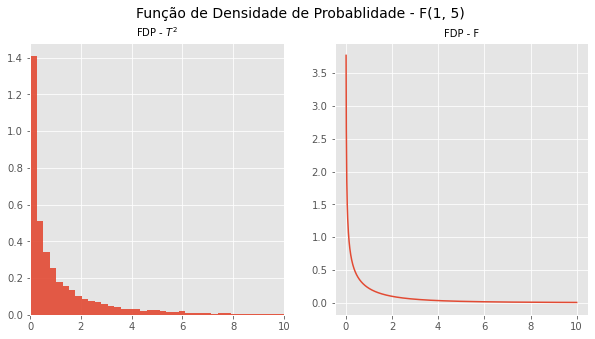

In [43]:
# Gerando uma T-Student ao quadrado
t_student_quadrado = [t**2 for t in t_student]

# Definindo intervalo
x = np.linspace(0, 10, 1000)

# Plottando
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Manual e do scipy stats
## Manual
axs[0].hist(t_student_quadrado, bins=500, density=True, alpha=.9)
axs[0].set_xlim(0, 10)
axs[0].set_title(r"FDP - $T^2$", size=10)

## FDP - Scipy
axs[1].plot(x, stats.f.pdf(x, dfn=1, dfd=n))
axs[1].set_title("FDP - F", size=10)

## Geral
fig.suptitle(f"Função de Densidade de Probablidade - F(1, {n})",
             size=14)